In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [141]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [5]:
df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


-  максимальная корреляция между average_montly_hours и number_project
-  наименьшая корреляция между average_montly_hours и satisfaction_level


In [20]:
df.groupby(['department']).size() 

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [21]:
df.groupby(['salary']).size() 

salary
high      1237
low       7316
medium    6446
dtype: int64

In [59]:
df.groupby(['department', 'salary']).size() 

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64

In [60]:
df.pivot_table(index='department', columns = 'salary', values = 'left', aggfunc = 'count', margins=True)

salary,high,low,medium,All
department,,,,
IT,83,609,535,1227
RandD,51,364,372,787
accounting,74,358,335,767
hr,45,335,359,739
management,225,180,225,630
marketing,80,402,376,858
product_mng,68,451,383,902
sales,269,2099,1772,4140
support,141,1146,942,2229


Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [74]:
df[['salary', 'average_montly_hours']].groupby(['salary']).mean()

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


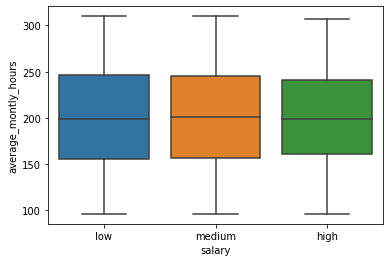

In [76]:
check = df.salary.value_counts().sort_values(ascending = False).head(5).index.values
check
ax = sns.boxplot(x='salary', y='average_montly_hours', 
            data=df[df.salary.isin(check)])


### гипотеза не подтвердилась. 


Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
-   Доля сотрудников с повышением за последние 5 лет
-   Средняя степень удовлетворенности
-  Среднее количество проектов

In [80]:
df_left = df[df['left'] == 1]
df_stay = df[df['left'] == 0]

In [116]:
# средняя степень удовлетворенности и среднее кол-во проектов среди уволившихся
df_left[['satisfaction_level','number_project']].mean()

satisfaction_level    0.440098
number_project        3.855503
dtype: float64

In [89]:
# средняя степень удовлетворенности и среднее кол-во проектов среди неуволившихся
df_stay[['satisfaction_level','number_project']].mean()

satisfaction_level    0.666810
number_project        3.786664
dtype: float64

In [115]:
# Доля сотрудников с повышением за последние 5 лет среди неуволившихся
len(df_stay[df_stay['promotion_last_5years'] == 1].index)/len(df_stay)

0.026251312565628283

In [106]:
# Доля сотрудников с повышением за последние 5 лет среди уволившихся
len(df_left[df_left['promotion_last_5years'] == 1].index)/len(df_left)

0.005320638476617194

In [142]:
del df['salary']

In [144]:
del df['department']

In [146]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

In [147]:
y_train, y_test = df_train['left'], df_test['left']
del df_train['left']
del df_test['left']

In [148]:
df_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
11840,0.50,0.90,5,226,2,0,0
2446,0.61,0.51,3,156,3,1,0
12693,0.10,0.83,6,278,4,0,0
5102,0.92,0.55,3,259,3,0,0
6553,0.80,0.55,4,144,5,1,0
...,...,...,...,...,...,...,...
6145,0.86,0.85,3,254,3,0,0
4016,0.92,0.85,3,235,2,0,0
4924,0.83,0.95,3,255,3,0,0
3518,0.15,0.76,5,277,4,0,0


In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [150]:
lda = LinearDiscriminantAnalysis()

In [151]:
lda.fit(df_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [153]:
lda.predict(df_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [155]:
result = pd.DataFrame([y_test.values, lda.predict(df_test)]).T

In [156]:
result

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,1


In [157]:
lda.coef_

array([[-4.49945693,  0.65049112, -0.23690106,  0.00460564,  0.23578562,
        -1.13101017, -1.09658383]])

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
accuracy_score(y_test, lda.predict(df_test))

0.7576666666666667